# HW4
이번 과제는 4절에서 배운 선형변환에 대해서 복습하고, 선형변환이 2D 이미지에서 어떻게 적용될 수 있는지 코드를 통해 실습합니다.

선형변환이란?
  
벡터공간 $V$에서 벡터공간 $W$로 가는 사상 $L:\,V\to W$ 이 다음 조건을 만족하면, 이를 선형변환(Linear Transformation) 이라 한다.  

$$L(\alpha\mathbf{v}_1+\beta\mathbf{v}_2)=\alpha L(\mathbf{v}_1)+\beta L(\mathbf{v}_2)$$  


이 때, $\mathbf{v}_1$ 과 $\mathbf{v}_2$는 $V$에 속한 임의의 벡터이고, $c$는 임의의 스칼라이다.

아래는 코드 실습으로, Q1~Q5의 행렬만 기입하시면 됩니다.

In [1]:
# 이미지 설치
!sudo apt install wget
!wget https://cdn.pixabay.com/photo/2023/05/23/15/26/bengal-cat-8012976_1280.jpg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
--2024-05-26 10:16:01--  https://cdn.pixabay.com/photo/2023/05/23/15/26/bengal-cat-8012976_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.40.96, 172.64.147.160, 2606:4700:4400::6812:2860, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.40.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176606 (172K) [image/jpeg]
Saving to: ‘bengal-cat-8012976_1280.jpg’

bengal-cat-8012976_ 100%[===================>] 172.47K  --.-KB/s    in 0.01s   

2024-05-26 10:16:01 (13.9 MB/s) - ‘bengal-cat-8012976_1280.jpg’ saved [176606/176606]



In [2]:
import cv2
import numpy as np
# from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
# 이미지 불러오기 및 크기 조절
img = cv2.imread('bengal-cat-8012976_1280.jpg')
img = cv2.resize(img, (400,600))

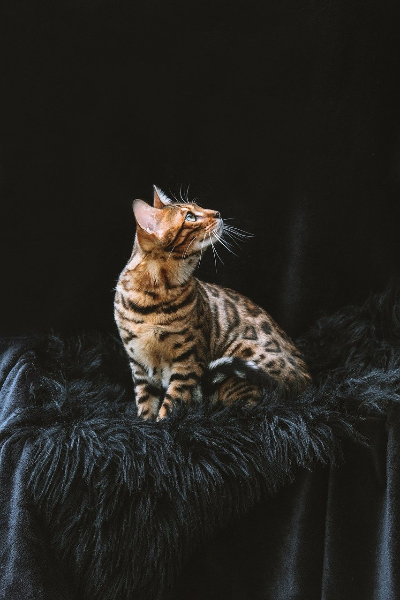

In [4]:
# 이미지 시각화
cv2_imshow(img)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)

In [5]:
# 선형변환을 시각화하기 위한 canvas를 만드는 함수.
# 해당 셀은 수정하지 마세요.
def linear_transformation(src, a):
    M, N, _ = src.shape
    corners = np.array([[0, 0, N - 1, N - 1], [0, M - 1, 0, M - 1]])
    new_points = a.dot(corners).astype(int)

    xcoord = new_points[0, :]
    ycoord = new_points[1, :]
    minx = np.amin(xcoord)
    maxx = np.amax(xcoord)
    miny = np.amin(ycoord)
    maxy = np.amax(ycoord)

    newN = maxx - minx + 1
    newM = maxy - miny + 1
    dest = np.full((newM, newN, 3), 200)
    y = miny
    for i in range(newM):
        x = minx
        for j in range(newN):
            pts = np.array([[x], [y]])
            newpts = np.linalg.inv(a).dot(pts).round().astype(int)
            if newpts[0] >= 0 and newpts[0] < N and newpts[1] >= 0 and newpts[1] < M:
                dest[i, j, :] = src[newpts[1], newpts[0], :]
            x = x + 1
        y = y + 1
    return dest

### Q1. $x$축 방향으로 1.5배 확대, $y$축 방향으로 0.7배 축소

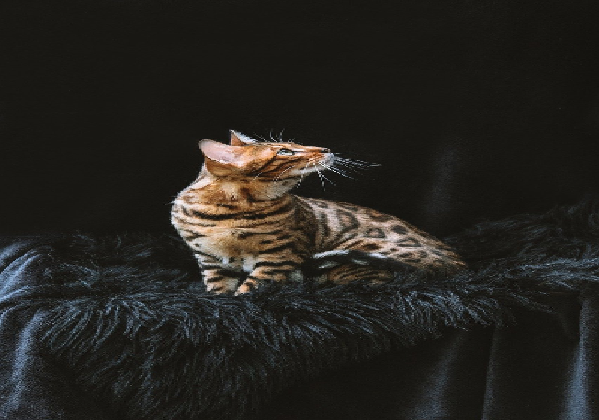

In [6]:
# Q1. # 자리에 올바른 값을 기입하세요
a = np.array(
    [
        [1.5, 0],
        [0, 0.7],
    ]
)

cv2_imshow(linear_transformation(img, a))
# plt.imshow(linear_transformation(img, a))

### Q2. 반시계 방향으로 45$^\circ$ 회전

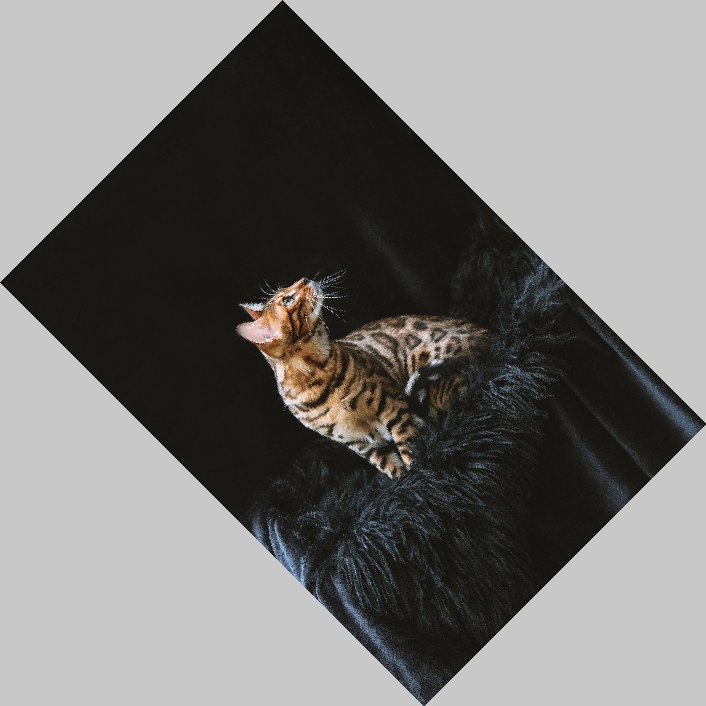

In [7]:
# Q2. # 자리에 올바른 값을 기입하세요
theta = np.radians(45)
b = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])


cv2_imshow(linear_transformation(img, b))
# plt.imshow(linear_transformation(img, b))

### Q3. y축을 기준으로 flip

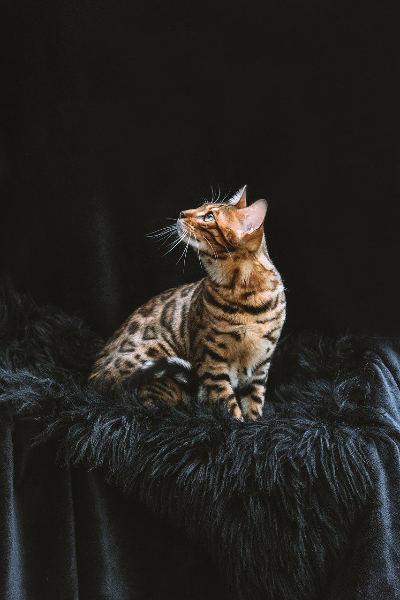

In [8]:
# Q3. # 자리에 올바른 값을 기입하세요
c = np.array([[-1, 0], [0, 1]])

cv2_imshow(linear_transformation(img, c))
# plt.imshow(linear_transformation(img, c))

### Q4. 0.5배 scale 후 시계 방향으로 60$^\circ$ 회전

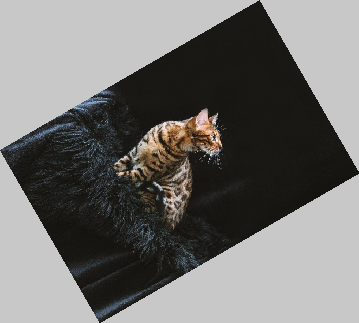

In [9]:
# Q4. # 자리에 올바른 값을 기입하세요

theta = np.radians(60)
d = 0.5 * np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])


cv2_imshow(linear_transformation(img, d))
# plt.imshow(linear_transformation(img, d))

### Q5. x축 기준으로 flip 후 y축 1.2배 확대

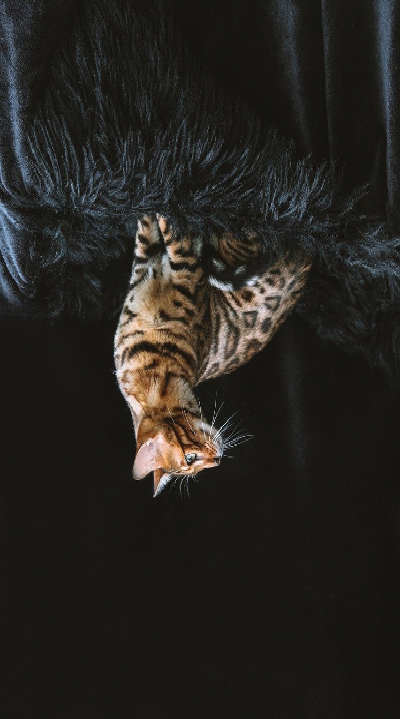

In [10]:
# Q5. # 자리에 올바른 값을 기입하세요
e = np.array([[1, 0], [0, -1.2]])

cv2_imshow(linear_transformation(img, e))
# plt.imshow(linear_transformation(img, e))

### Q6. 반시계 방향으로 90$^\circ$ 회전 후 x축 1.3배 확대

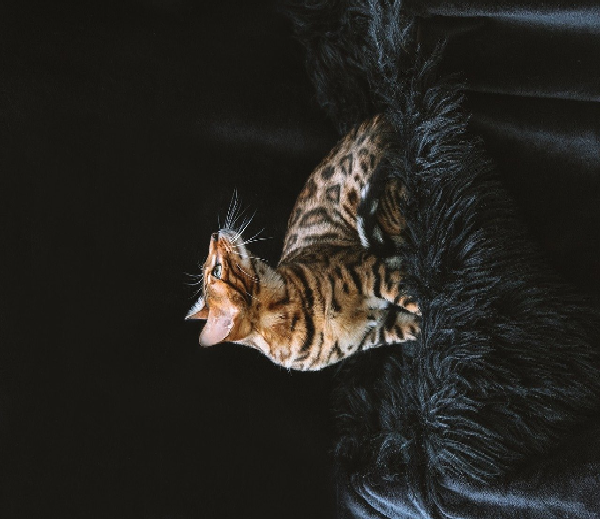

In [11]:
# Q6. # 자리에 올바른 값을 기입하세요
f = np.array([[0, 1], [-1.3, 0]])

cv2_imshow(linear_transformation(img, f))
# plt.imshow(linear_transformation(img, f))

### Q7. 시계 방향으로 90$^\circ$ 회전 후 x축 기준으로 flip 후 y축 0.8배 축소

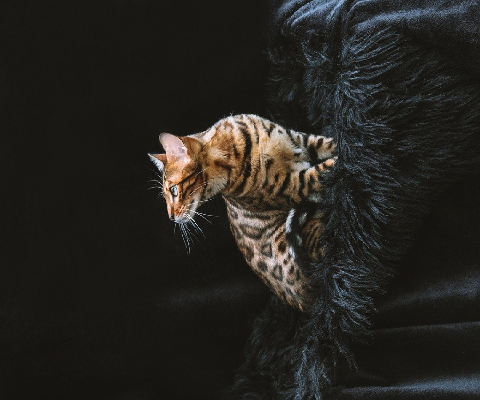

In [12]:
# Q7. # 자리에 올바른 값을 기입하세요
g = np.array([
    [0, 0.8],
    [1, 0]
])
cv2_imshow(linear_transformation(img, g))
# plt.imshow(linear_transformation(img, g))